### **US Superstore Analysis**

![World of Shopping](https://thumbs.dreamstime.com/z/online-shopping-flat-design-world-illustration-50444436.jpg)




Toko online telah berkembang menjadi salah satu primadona di masa kini karena kemudahan dan kenyamanannya bagi orang-orang untuk memilih dan membeli barang-barang yang mereka inginkan cukup dari lewat aplikasi di handphone mereka dan mereka bisa melakukan itu di rumah atau di kantor tanpa harus mendatangi tokonya secara langsung

Salah satu hal yang paling menarik dari toko online adalah di masa liburan panjang karena pada umumnya toko-toko konvensional sangat ramai diserbu pengunjung dimasa liburan dan bisa menyebabkan antrian panjang yang membuat orang-orang menjadi malas untuk mengantre. Namun, keberadaan toko online ini membuat orang-orang menjadi tidak perlu mengantre lagi untuk mendapatkan barang-barang yang mereka inginkan

**Import Libraries Tambahan**

In [139]:
!pip install jcopml

##### **Import Libraries**

In [140]:
#operasi dasar
import pandas as pd
import numpy as np

#visualisasi data
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

##### **Import Dataset**

In [141]:
df = pd.read_excel(r'US Superstore data.xls')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


### **Data Cleaning**

In [142]:
from jcopml.plot import plot_missing_value

,missing_value,%
Row ID,0,0.0
Order ID,0,0.0
Order Date,0,0.0
Ship Date,0,0.0
Ship Mode,0,0.0
Customer ID,0,0.0
Customer Name,0,0.0
Segment,0,0.0
Country,0,0.0
City,0,0.0


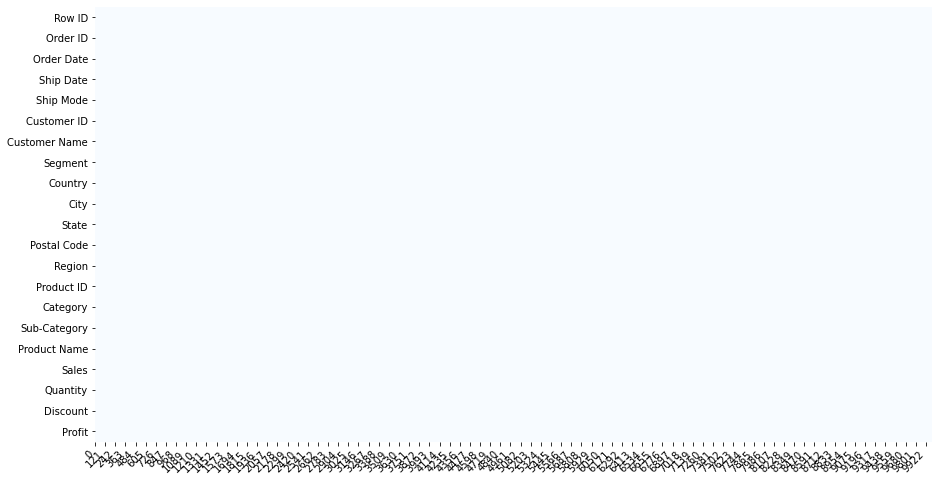

In [143]:
plot_missing_value(df, return_df=True)

In [144]:
print(f'Dataset memiliki {df.shape[0]} baris dan {df.shape[1]} kolom')

Dataset memiliki 9994 baris dan 21 kolom


In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

Dataset tidak memiliki missing values

##### **Membuang Kolom yang tidak perlu**

In [146]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [147]:
df.describe(include=['object'])

,Order ID,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name
count,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994
unique,5009,4,793,793,3,1,531,49,4,1862,3,17,1850
top,CA-2017-100111,Standard Class,WB-21850,William Brown,Consumer,United States,New York City,California,West,OFF-PA-10001970,Office Supplies,Binders,Staple envelope
freq,14,5968,37,37,5191,9994,915,2001,3203,19,6026,1523,48


In [148]:
df['Row ID'].head(10)

0     1
1     2
2     3
3     4
4     5
5     6
6     7
7     8
8     9
9    10
Name: Row ID, dtype: int64

1. Kolom Row ID -> hanya berisi serial number yang tidak banyak memberikan informasi apapun sehingga bisa kita drop
2. Kolom Country -> setelah di describe pun terlihat hanya memiliki 1 unique value yaitu United States sehingga tidak banyak memberikan informasi dan bisa kita drop

In [149]:
df.drop('Row ID', axis=1, inplace=True)

In [150]:
df.drop('Country', axis=1, inplace=True)

In [151]:
print(df.shape)
df.head(3)

(9994, 19)


,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820
2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714


##### **Data Visualization**

Kita ingin melihat variasi dari Office Supplies yang ada di toko

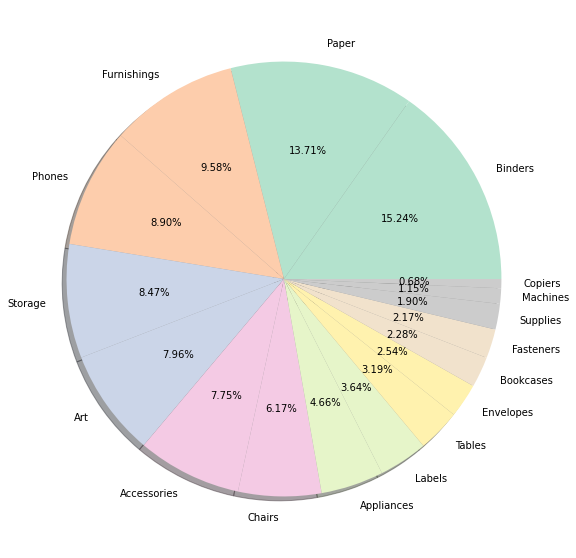

In [152]:
plt.figure(figsize=(12,10))
variasi = df['Sub-Category'].value_counts()
colors = plt.cm.Pastel2(np.linspace(0, 1, 17))
variasi.plot.pie(colors=colors, autopct='%.2f%%', shadow=True)
plt.axis('off')
plt.show()

Terlihat bahwa store memiliki variasi office supplies yang beragam terutama untuk departemen binder dan kertas

In [155]:
profit = pd.DataFrame(df.groupby('Sub-Category')['Profit', 'Sales'].agg(['sum']))
profit

,Profit,Sales
,sum,sum
Sub-Category,,
Accessories,41936.6357,167380.3180
Appliances,18138.0054,107532.1610
Art,6527.7870,27118.7920
Binders,30221.7633,203412.7330
Bookcases,-3472.5560,114879.9963
Chairs,26590.1663,328449.1030
Copiers,55617.8249,149528.0300
Envelopes,6964.1767,16476.4020


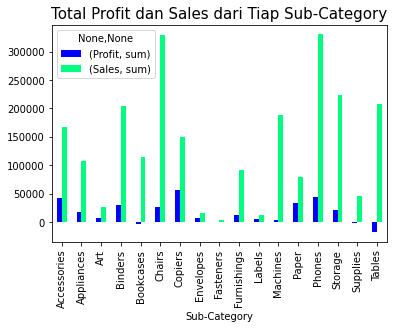

In [156]:
colors = plt.cm.winter(np.linspace(0, 1, 2))
profit.plot.bar(color=colors)
plt.title('Total Profit dan Sales dari Tiap Sub-Category', fontsize=15)
plt.show()

Profit tertinggi didapat oleh Copiers. Sementara itu hasil penjualan kursi dan telepon merupakan yang tertinggi di toko, jauh lebih tinggi dibanding penjualan sub-category lainnya

Uniknya, orang-orang cenderung untuk tidak membeli meja dan rak buku di store. Ini terlihat dari profit minus yang didapatkan oleh toko

Berikutnya kita akan melihat produk-produk apa saja yang dijual di toko

In [157]:
print('Superstore menjual {} jenis barang, diantaranya: '.format(df['Product Name'].nunique()))
print()
df['Product Name'].value_counts()

Superstore menjual 1850 jenis barang, diantaranya: 



Staple envelope                                                            48
Easy-staple paper                                                          46
Staples                                                                    46
Avery Non-Stick Binders                                                    20
Staples in misc. colors                                                    19
                                                                           ..
Xerox 1918                                                                  1
Universal Ultra Bright White Copier/Laser Paper, 8 1/2" x 11", Ream         1
NeatDesk Desktop Scanner & Digital Filing System                            1
Avery 484                                                                   1
Sanitaire Vibra Groomer IR Commercial Upright Vacuum, Replacement Belts     1
Name: Product Name, Length: 1850, dtype: int64

Karena begitu banyaknya produk yang dijual di superstore, kita hanya akan melihat 10 barang dengan distribusi terbesar di superstore

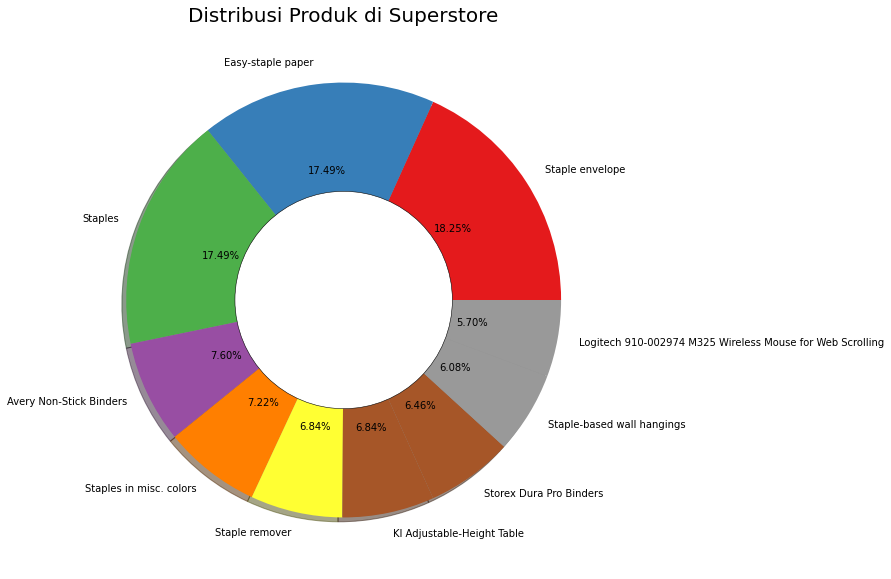

In [158]:
plt.figure(figsize=(12, 10))
produk = df['Product Name'].value_counts().head(10)
colors=plt.cm.Set1(np.linspace(0, 1, 10))
produk.plot.pie(colors=colors, autopct='%.2f%%', shadow=True)

center_circle = plt.Circle((0,0), 0.5, color='black', fc='white', linewidth=.55)
fig = plt.gcf()
fig.gca().add_artist(center_circle)

plt.title('Distribusi Produk di Superstore', fontsize=20)
plt.axis('off')
plt.show()

Terlihat bahwa produk Staple envelope dan Easy-staple paper merupakan produk dengan distribusi terbesar di superstore

Berikutnya kita akan melihat count dari sub-category dilihat dari regionnya

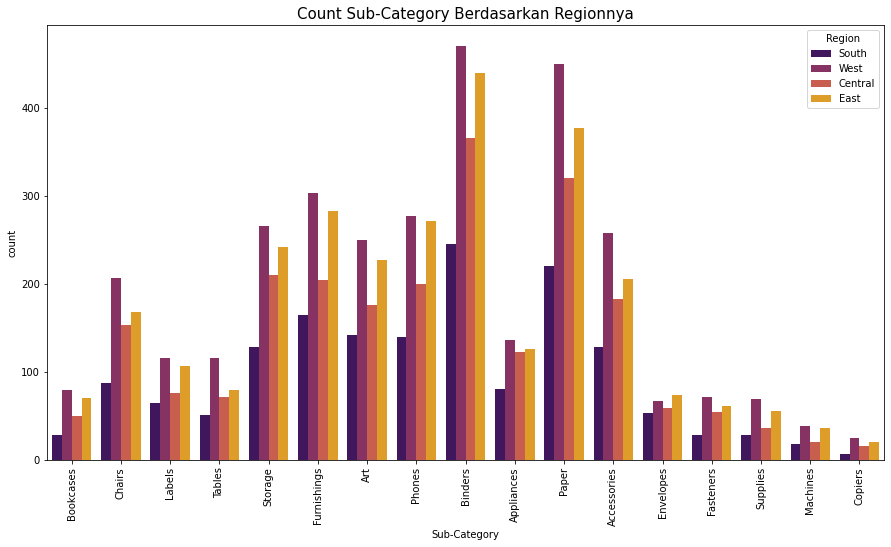

In [159]:
plt.figure(figsize=(15, 8))
ax = sns.countplot(df['Sub-Category'], hue='Region', data=df, palette='inferno')
ax.set_title(label='Count Sub-Category Berdasarkan Regionnya', fontsize=15)
plt.xticks(rotation=90)
plt.show()

Orang-orang yang tinggal di Wilayah Barat cenderung membeli barang lebih sering di superstore

**Membuat Kolom Baru Untuk Mendapat Pemahaman Yang Lebih Baik dari Dataset**

1. Cost

In [160]:
df['Cost'] = df['Sales']-df['Profit']

2. Profit

In [161]:
df['% Profit'] = (df['Profit']/df['Cost'])*100

3. Shipment Duration

In [162]:
df['Shipment Duration'] = ((pd.to_datetime(df['Ship Date'])) - (pd.to_datetime(df['Order Date']))).dt.days

4. Order Year

In [163]:
df['Order Year'] = df['Order Date'].dt.year

5. Order Month

In [164]:
df['Order Month'] = df['Order Date'].dt.month
df[['Product Name', 'Order Month']].head()

,Product Name,Order Month
0,Bush Somerset Collection Bookcase,11
1,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",11
2,Self-Adhesive Address Labels for Typewriters b...,6
3,Bretford CR4500 Series Slim Rectangular Table,10
4,Eldon Fold 'N Roll Cart System,10


6. Season

In [165]:
df['Order Date'].dt.strftime('%B')

0       November
1       November
2           June
3        October
4        October
          ...   
9989     January
9990    February
9991    February
9992    February
9993         May
Name: Order Date, Length: 9994, dtype: object

In [166]:
def season(x):
    if x>=3 and x<=5:
        a = 'Spring'
        
    elif x>=6 and x<=8:
        a = 'Summer'
        
    elif x>=9 and x<=11:
        a = 'Fall'
        
    else:
        a = 'Winter'
    return a

In [173]:
df.loc[:4, ['Product Name', 'Sales', 'Quantity', 'Discount', 'Profit', 'Cost', '% Profit', 'Shipment Duration', 'Order Year', 'Order Month', 'Season']]

,Product Name,Sales,Quantity,Discount,Profit,Cost,% Profit,Shipment Duration,Order Year,Order Month,Season
0,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,220.0464,19.047619,3,2016,11,Fall
1,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,512.3580,42.857143,3,2016,11,Fall
2,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,7.7486,88.679245,4,2016,6,Summer
3,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,1340.6085,-28.571429,7,2015,10,Fall
4,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,19.8516,12.676056,7,2015,10,Fall


In [169]:
df['Season'] = df['Order Month'].apply(season)
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Cost,% Profit,Shipment Duration,Order Year,Order Month,Season
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,220.0464,19.047619,3,2016,11,Fall
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,512.3580,42.857143,3,2016,11,Fall
2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,7.7486,88.679245,4,2016,6,Summer
3,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,1340.6085,-28.571429,7,2015,10,Fall
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,19.8516,12.676056,7,2015,10,Fall


In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Order ID           9994 non-null   object        
 1   Order Date         9994 non-null   datetime64[ns]
 2   Ship Date          9994 non-null   datetime64[ns]
 3   Ship Mode          9994 non-null   object        
 4   Customer ID        9994 non-null   object        
 5   Customer Name      9994 non-null   object        
 6   Segment            9994 non-null   object        
 7   City               9994 non-null   object        
 8   State              9994 non-null   object        
 9   Postal Code        9994 non-null   int64         
 10  Region             9994 non-null   object        
 11  Product ID         9994 non-null   object        
 12  Category           9994 non-null   object        
 13  Sub-Category       9994 non-null   object        
 14  Product 

In [171]:
print(f'Setelah Data Preprocess, dataset memiliki {df.shape[0]} baris dan {df.shape[1]} kolom')

Setelah Data Preprocess, dataset memiliki 9994 baris dan 25 kolom


Berikutnya kita akan melihat persentase profit dari 5 produk

In [176]:
df.iloc[[0,1,2,3,4], [14,20]]

,Product Name,% Profit
0,Bush Somerset Collection Bookcase,19.047619
1,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",42.857143
2,Self-Adhesive Address Labels for Typewriters b...,88.679245
3,Bretford CR4500 Series Slim Rectangular Table,-28.571429
4,Eldon Fold 'N Roll Cart System,12.676056


Berikutnya kita akan melihat Sub-Category yang mendapatkan persentasi profit 100%

In [194]:
df1 = df.sort_values(['% Profit', 'Product Name'], ascending=False)
pd.set_option('display.max_rows', 50)
df1.groupby('% Profit')['Sub-Category', '% Profit'].head()

,Sub-Category,% Profit
1696,Phones,100.000000
4611,Binders,100.000000
3984,Paper,100.000000
4651,Paper,100.000000
6600,Paper,100.000000
...,...,...
8916,Appliances,-72.972973
8766,Appliances,-73.333333
676,Appliances,-73.333333
261,Appliances,-73.333333


In [197]:
df['Sub-Category'][df['% Profit']==100.000000].value_counts()

Binders        45
Paper          31
Envelopes      20
Labels         16
Fasteners      11
Art             5
Furnishings     5
Phones          3
Machines        2
Copiers         2
Name: Sub-Category, dtype: int64

Terlihat bahwa Sub-Category binders, paper, envelopes, labels, fasteners, art, furnishings, phones, machines, dan copiers pernah mendapat persentase profit sebesar 100% dengan sub-category binders merupakan sub-category yang paling sering mendapatkan persentase profit 100%

Berikutnya kita akan melihat distribusi per segmennya

In [200]:
segmen = df['Segment'].value_counts()
segmen

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

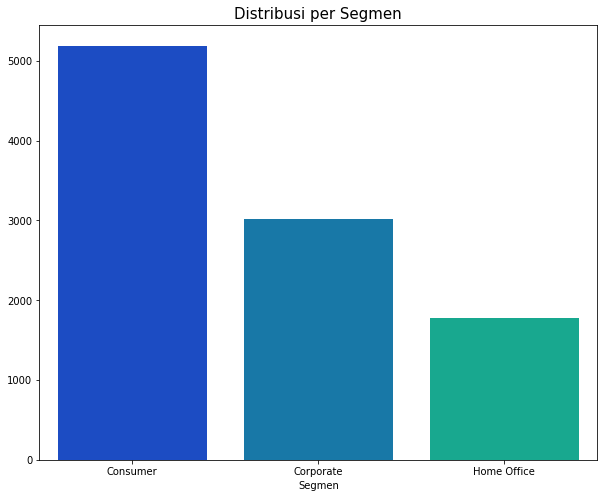

In [201]:
plt.figure(figsize=(10, 8))
ax = sns.barplot(x=segmen[:].index, y=segmen[:].values, palette='winter')
ax.set_title(label='Distribusi per Segmen', fontsize=15)
ax.set_xlabel(xlabel='Segmen', fontsize=10)
plt.show()

Terlihat bahwa distribusi tertinggi ada di segmen Consumer

Berikutnya kita akan melihat siapakah pelanggan yang memberikan profit terbesar bagi toko dan berasal dari state manakah pelanggan tersebut

In [202]:
Top_20_Customer = df.sort_values(['Profit'], ascending=False).head(20)
Top_20_Customer

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Cost,% Profit,Shipment Duration,Order Year,Order Month,Season
6826,CA-2016-118689,2016-10-02,2016-10-09,Standard Class,TC-20980,Tamara Chand,Corporate,Lafayette,Indiana,47905,Central,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,17499.950,5,0.0,8399.9760,9099.9740,92.307692,7,2016,10,Fall
8153,CA-2017-140151,2017-03-23,2017-03-25,First Class,RB-19360,Raymond Buch,Consumer,Seattle,Washington,98115,West,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,13999.960,4,0.0,6719.9808,7279.9792,92.307692,2,2017,3,Spring
4190,CA-2017-166709,2017-11-17,2017-11-22,Standard Class,HL-15040,Hunter Lopez,Consumer,Newark,Delaware,19711,East,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,10499.970,3,0.0,5039.9856,5459.9844,92.307692,5,2017,11,Fall
9039,CA-2016-117121,2016-12-17,2016-12-21,Standard Class,AB-10105,Adrian Barton,Consumer,Detroit,Michigan,48205,Central,OFF-BI-10000545,Office Supplies,Binders,GBC Ibimaster 500 Manual ProClick Binding System,9892.740,13,0.0,4946.3700,4946.3700,100.000000,4,2016,12,Winter
4098,CA-2014-116904,2014-09-23,2014-09-28,Standard Class,SC-20095,Sanjit Chand,Consumer,Minneapolis,Minnesota,55407,Central,OFF-BI-10001120,Office Supplies,Binders,Ibico EPK-21 Electric Binding System,9449.950,5,0.0,4630.4755,4819.4745,96.078431,5,2014,9,Fall
2623,CA-2017-127180,2017-10-22,2017-10-24,First Class,TA-21385,Tom Ashbrook,Home Office,New York City,New York,10024,East,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,11199.968,4,0.2,3919.9888,7279.9792,53.846154,2,2017,10,Fall
509,CA-2015-145352,2015-03-16,2015-03-22,Standard Class,CM-12385,Christopher Martinez,Consumer,Atlanta,Georgia,30318,South,OFF-BI-10003527,Office Supplies,Binders,Fellowes PB500 Electric Punch Plastic Comb Bin...,6354.950,5,0.0,3177.4750,3177.4750,100.000000,6,2015,3,Spring
8488,CA-2016-158841,2016-02-02,2016-02-04,Second Class,SE-20110,Sanjit Engle,Consumer,Arlington,Virginia,22204,South,TEC-MA-10001127,Technology,Machines,HP Designjet T520 Inkjet Large Format Printer ...,8749.950,5,0.0,2799.9840,5949.9660,47.058824,2,2016,2,Winter
7666,US-2016-140158,2016-10-04,2016-10-08,Standard Class,DR-12940,Daniel Raglin,Home Office,Providence,Rhode Island,2908,East,TEC-CO-10001449,Technology,Copiers,Hewlett Packard LaserJet 3310 Copier,5399.910,9,0.0,2591.9568,2807.9532,92.307692,4,2016,10,Fall
6520,CA-2017-138289,2017-01-16,2017-01-18,Second Class,AR-10540,Andy Reiter,Consumer,Jackson,Michigan,49201,Central,OFF-BI-10004995,Office Supplies,Binders,GBC DocuBind P400 Electric Binding System,5443.960,4,0.0,2504.2216,2939.7384,85.185185,2,2017,1,Winter


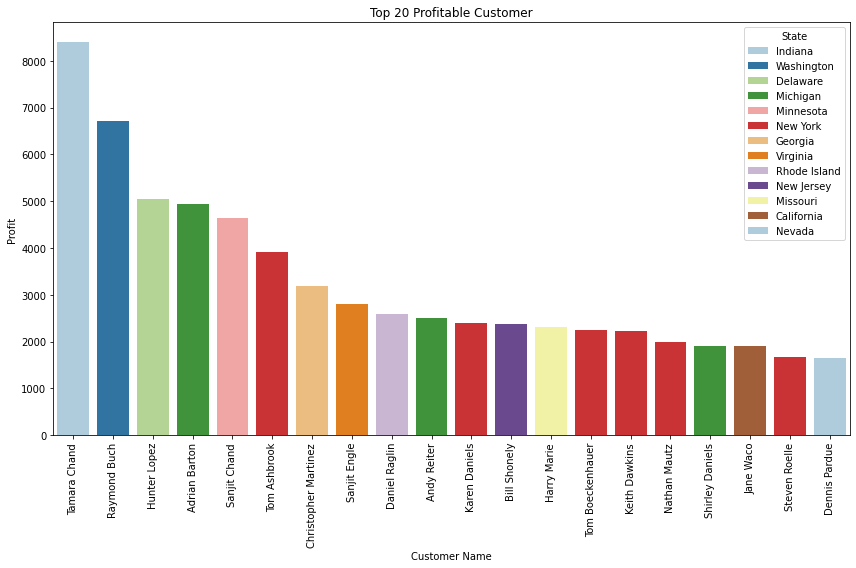

In [203]:
fig = plt.figure(figsize=(12, 8))
yoi = sns.color_palette('Paired', n_colors=20, desat=1)
sns.barplot(x='Customer Name', y='Profit', hue='State', palette=yoi, data=Top_20_Customer, dodge=False)
plt.xticks(rotation=90)
plt.title('Top 20 Profitable Customer')
plt.tight_layout()
#plt.savefig('G:\Online Course\Dataset\CRP\Top 20 Profitable Customer.png')
plt.show()

Customer atas nama Tamara Chand dari Indiana merupakan customer yang memberikan profit terbesar bagi superstore. Walaupun begitu, mayoritas pelanggan yang memberikan profit besar berasal dari New York.

Berikutnya kita akan melihat total sales dan profit per tahunnya

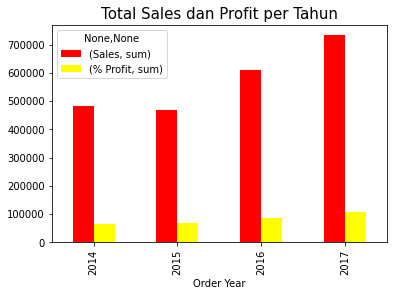

In [212]:
colors = plt.cm.autumn(np.linspace(0, 1, 2))
sales_per_year = df.groupby('Order Year')['Sales', '% Profit'].agg(['sum'])
sales_per_year.plot.bar(color=colors)
plt.title('Total Sales dan Profit per Tahun', fontsize=15)
plt.show()

Terlihat bahwa total sales dan profit sejak tahun 2014 terus mengalami peningkatan hingga akhir tahun 2017

Berikutnya kita akan melihat pengaruh pemberian diskon terhadap profit bagi superstore

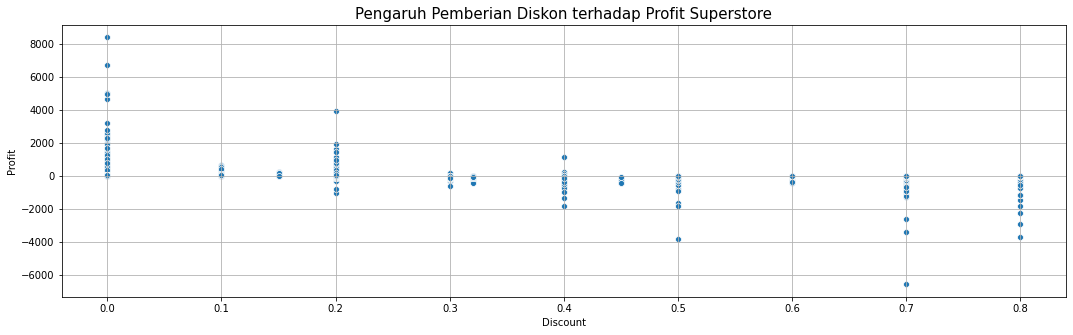

In [214]:
plt.figure(figsize=(18, 5))
sns.scatterplot(x='Discount', y='Profit', data=df, palette='winter')
plt.title('Pengaruh Pemberian Diskon terhadap Profit Superstore', fontsize=15)
plt.grid()
plt.show()

Disini terlihat bahwa apabila diskon yang diberikan kurang dari 30%, maka akan diperoleh profit gain. Akan tetapi, jika profitnya lebih dari sama dengan 30% maka akan didapatkan profit loss. Dengan begitu sebaiknya superstore lebih bijak lagi dalam memberikan diskon, terutama pemberian diskonnya harus kurang dari 30%

Berikutnya kita akan melihat penjualan dari tiap kategori per musim

In [216]:
tabulasi_silang = pd.crosstab(df['Season'], df['Category'])
tabulasi_silang

Category,Furniture,Office Supplies,Technology
Season,,,
Fall,788,2204,681
Spring,428,1284,387
Summer,433,1307,393
Winter,472,1231,386


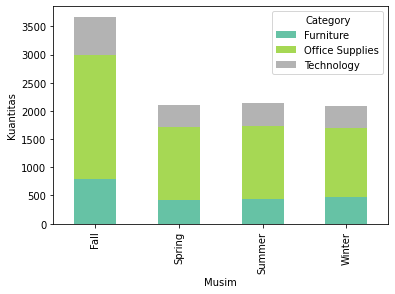

In [228]:
tabulasi_silang.plot(kind='bar', stacked=True, color=plt.cm.Set2(np.linspace(0,1,3)))
plt.xlabel('Musim')
plt.ylabel('Kuantitas')
plt.show()

Terlihat bahwa penjualan terbanyak terjadi di musim gugur